In [1735]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [1736]:
df = pd.read_csv('/Users/jonathanbeatty/Desktop/DataSets/Project_2/train.csv')

test_df = pd.read_csv('/Users/jonathanbeatty/Desktop/DataSets/Project_2/test.csv')

In [1737]:
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [1738]:
test_df.isnull().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      160
Lot Area            0
Street              0
Alley             821
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        1
Mas Vnr Area        1
Exter Qual          0
Exter Cond          0
                 ... 
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Cars         0
Garage Area         0
Garage Qua

## Im dropping columns that have very few non null numbers in conjunction with how they are used according to the documentation for the dataset.

In [1739]:
df.drop('Pool QC', axis = 1, inplace= True)
df.drop('Misc Feature', axis = 1, inplace = True)
df.drop('Fence', axis = 1, inplace = True)
df.drop('Alley', axis = 1, inplace = True)
df.drop('Lot Frontage', axis = 1, inplace = True)
df.drop('Bsmt Qual', axis = 1, inplace = True)
df.drop('Bsmt Cond', axis = 1, inplace = True)
df.drop('Bsmt Exposure', axis = 1, inplace = True)
df.drop('BsmtFin Type 1', axis = 1, inplace = True)
df.drop('BsmtFin Type 2', axis = 1, inplace = True)
df.drop('Electrical', axis = 1, inplace = True)
df.drop('Fireplace Qu', axis = 1, inplace = True)
df.drop('Garage Type', axis = 1, inplace = True)
df.drop('Garage Yr Blt', axis = 1, inplace = True)
df.drop('Garage Finish', axis = 1, inplace = True)
df.drop('Garage Qual', axis = 1, inplace = True)
df.drop('Garage Cond', axis = 1, inplace = True)
df.drop('Mas Vnr Area', axis = 1, inplace = True)
df.drop('Id', axis = 1, inplace= True)
df.drop('PID', axis = 1, inplace= True)

In [1740]:
test_df.drop('Pool QC', axis = 1, inplace= True)
test_df.drop('Misc Feature', axis = 1, inplace = True)
test_df.drop('Fence', axis = 1, inplace = True)
test_df.drop('Alley', axis = 1, inplace = True)
test_df.drop('Lot Frontage', axis = 1, inplace = True)
test_df.drop('Bsmt Qual', axis = 1, inplace = True)
test_df.drop('Bsmt Cond', axis = 1, inplace = True)
test_df.drop('Bsmt Exposure', axis = 1, inplace = True)
test_df.drop('BsmtFin Type 1', axis = 1, inplace = True)
test_df.drop('BsmtFin Type 2', axis = 1, inplace = True)
test_df.drop('Electrical', axis = 1, inplace = True)
test_df.drop('Fireplace Qu', axis = 1, inplace = True)
test_df.drop('Garage Type', axis = 1, inplace = True)
test_df.drop('Garage Yr Blt', axis = 1, inplace = True)
test_df.drop('Garage Finish', axis = 1, inplace = True)
test_df.drop('Garage Qual', axis = 1, inplace = True)
test_df.drop('Garage Cond', axis = 1, inplace = True)
test_df.drop('Mas Vnr Area', axis = 1, inplace = True)
test_df.drop('PID', axis = 1, inplace= True)

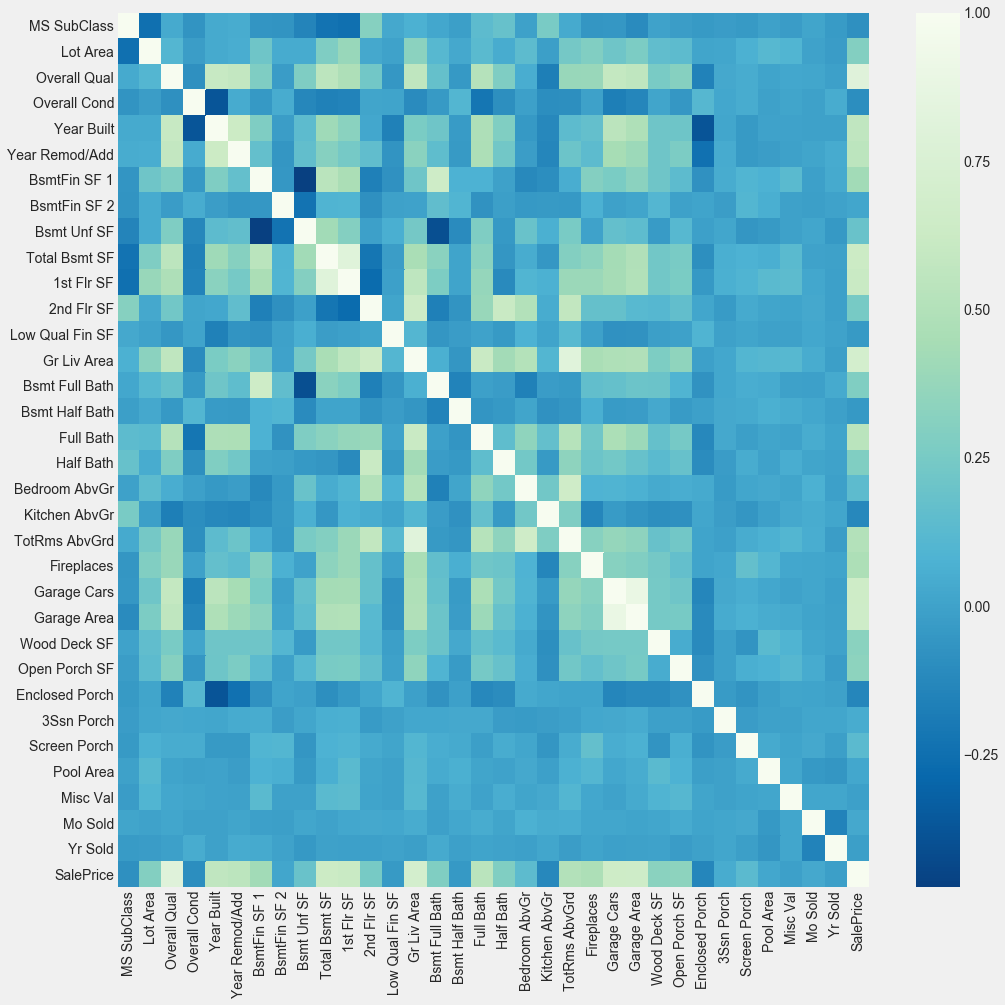

In [1741]:
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(), cmap="GnBu_r",)

In [1742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 61 columns):
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Area           2051 non-null int64
Street             2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st       2051 non-null object
Exterior 2nd       2051 non-null object
Mas Vnr Type       

In [1743]:
test_df.isnull().sum()

Id                 0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       1
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
                  ..
Heating            0
Heating QC         0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces   

## Below I am dropping all of the null values and just replacing them with 0's. This may not be ideal in the long run but for my intial findings this will give me a good baseline to work from.

In [1744]:
df.fillna(0.0,inplace=True)

In [1745]:
test_df.fillna(0.0,inplace=True)

## Time to get dummies!!!! Below I am going through the two dataframes and splitting them on the objects and numeric column. After that I get dummies the object data frames and then I concat them back together with the numeric data frames.

In [1746]:
df_numeric_1 = df.select_dtypes(['number'])

In [1866]:
test_df_numeric_1 = test_df.select_dtypes(['number'])
test_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Columns: 181 entries, Id to Sale Type_WD 
dtypes: float64(8), int64(26), uint8(147)
memory usage: 359.7 KB


In [1867]:
df_objects = df.select_dtypes(include='object')
df_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 27 columns):
MS Zoning       2051 non-null object
Street          2051 non-null object
Lot Shape       2051 non-null object
Land Contour    2051 non-null object
Utilities       2051 non-null object
Lot Config      2051 non-null object
Land Slope      2051 non-null object
Neighborhood    2051 non-null object
Condition 1     2051 non-null object
Condition 2     2051 non-null object
Bldg Type       2051 non-null object
House Style     2051 non-null object
Roof Style      2051 non-null object
Roof Matl       2051 non-null object
Exterior 1st    2051 non-null object
Exterior 2nd    2051 non-null object
Mas Vnr Type    2051 non-null object
Exter Qual      2051 non-null object
Exter Cond      2051 non-null object
Foundation      2051 non-null object
Heating         2051 non-null object
Heating QC      2051 non-null object
Central Air     2051 non-null object
Kitchen Qual    2051 non-null object
Funct

In [1749]:
test_df_objects = test_df.select_dtypes(include='object')

In [1750]:
test_df_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 27 columns):
MS Zoning       879 non-null object
Street          879 non-null object
Lot Shape       879 non-null object
Land Contour    879 non-null object
Utilities       879 non-null object
Lot Config      879 non-null object
Land Slope      879 non-null object
Neighborhood    879 non-null object
Condition 1     879 non-null object
Condition 2     879 non-null object
Bldg Type       879 non-null object
House Style     879 non-null object
Roof Style      879 non-null object
Roof Matl       879 non-null object
Exterior 1st    879 non-null object
Exterior 2nd    879 non-null object
Mas Vnr Type    879 non-null object
Exter Qual      879 non-null object
Exter Cond      879 non-null object
Foundation      879 non-null object
Heating         879 non-null object
Heating QC      879 non-null object
Central Air     879 non-null object
Kitchen Qual    879 non-null object
Functional      879 non-null ob

In [1751]:
dummy_var = df_objects.columns
test_dummy_var = test_df_objects.columns

In [1752]:
df_get_dum = pd.get_dummies(df_objects, columns = dummy_var ,drop_first = True )

In [1753]:
test_df_get_dum = pd.get_dummies(test_df_objects, columns = test_dummy_var ,drop_first = True)

In [1754]:
df_numeric = pd.concat([df_numeric_1, df_get_dum], axis =1)

In [1868]:
test_df_numeric = pd.concat([test_df_numeric_1, test_df_get_dum], axis =1)

In [1869]:
test_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Columns: 181 entries, Id to Sale Type_WD 
dtypes: float64(8), int64(26), uint8(147)
memory usage: 359.7 KB


In [1870]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 191 entries, MS SubClass to Sale Type_WD 
dtypes: float64(8), int64(26), uint8(157)
memory usage: 859.3 KB


## This cell below was used to identify the extra columns in the training data frame that dont appear in the test data frame

In [1796]:
set(df_numeric.columns) ^ set(test_df_numeric.columns)

{'Condition 2_Feedr',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_PreCast',
 'Exterior 1st_Stone',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Exterior 2nd_Stone',
 'Functional_Sal',
 'Functional_Sev',
 'Heating QC_Po',
 'Heating_GasA',
 'Heating_OthW',
 'Heating_Wall',
 'Id',
 'Kitchen Qual_Po',
 'MS Zoning_C (all)',
 'Mas Vnr Type_CBlock',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_CompShg',
 'Roof Matl_Membran',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Type_VWD',
 'SalePrice',
 'Utilities_NoSeWa'}

In [1759]:
poly = PolynomialFeatures()

## The cell below is assigning a list of the columns that exist in both Dataframes, I save that to a variable to call later to prevent mis alignment during fitting and predicting.

In [1794]:
common_to_both = list(set(df_numeric.columns) & set(test_df_numeric.columns))
len(common_to_both)

171

## Below Im assigning different data frames to variable for train test splitting and eventual testing and predicting

In [1890]:
features = [each for each in df_numeric.columns if each != 'SalePrice']
features_test = [each for each in test_df_numeric.columns if each != 'SalePrice']
X = df_numeric[common_to_both]
y = df_numeric['SalePrice']
X_test_num = test_df_numeric[common_to_both]
kaggle_n = test_df_numeric[common_to_both]
y = np.log(y)

In [1892]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1856]:
# twenty_lowest = list(pd.concat([X_train, y_train],
#                      axis=1).corr()
#                      ['SalePrice'].sort_values().index[1:21])
# twenty_highest = list(pd.concat([X_train, y_train],
#                           axis=1).corr()
#                 ['SalePrice']
#                 .sort_values(
#                     ascending=False).index[1:21])

In [1849]:
X.describe()

,Lot Area,Overall Qual,Year Built,Year Remod/Add,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,10065.208191,6.112140,1971.708922,1984.190151,1164.488055,1499.330083,1.577279,1.775719,473.440761,1057.471965,1164.488055,6.435885
std,6742.488909,1.426271,30.177889,21.036250,396.446923,500.447829,0.549279,0.765357,216.135102,449.908003,396.446923,1.560225
min,1300.000000,1.000000,1872.000000,1950.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000
25%,7500.000000,5.000000,1953.500000,1964.500000,879.500000,1129.000000,1.000000,1.000000,319.000000,793.000000,879.500000,5.000000
50%,9430.000000,6.000000,1974.000000,1993.000000,1093.000000,1444.000000,2.000000,2.000000,480.000000,994.000000,1093.000000,6.000000
75%,11513.500000,7.000000,2001.000000,2004.000000,1405.000000,1728.500000,2.000000,2.000000,576.000000,1318.500000,1405.000000,7.000000
max,159000.000000,10.000000,2010.000000,2010.000000,5095.000000,5642.000000,4.000000,5.000000,1418.000000,6110.000000,5095.000000,15.000000


## LINEAR REGRESSION MODELING

## Here I am instatiating a linear regression model and fitting it to get a basic score on my training and test data on the model

score:  0.8683444085390907


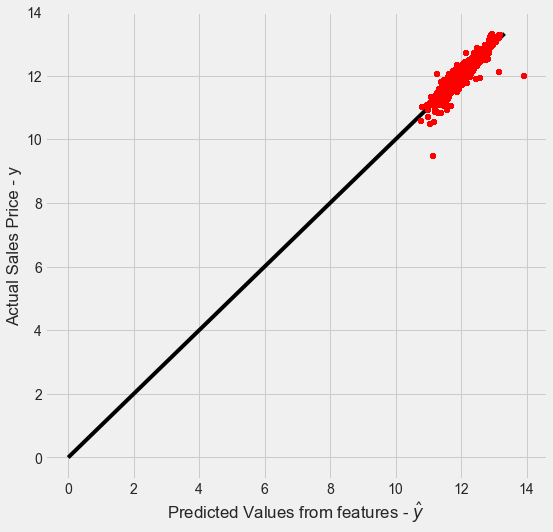

In [1879]:
lr = LinearRegression()

lr = lr.fit(X_train, y_train)
predictions = lr.predict(X_train)
score =  lr.score(X_train, y_train)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features - $\hat{y}$")
plt.ylabel("Actual Sales Price - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')


print("score: ", score)

score:  0.9449595828335227


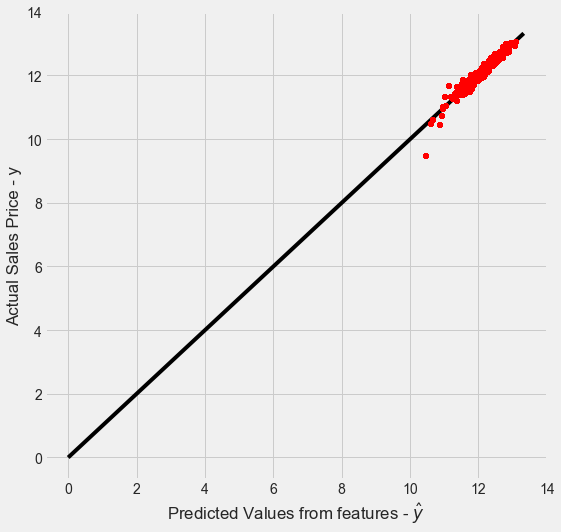

In [1845]:
lr = LinearRegression()
lr = lr.fit(X_test, y_test)
predictions = lr.predict(X_test)
score =  lr.score(X_test, y_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features - $\hat{y}$")
plt.ylabel("Actual Sales Price - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')


print("score: ", score)

In [1832]:
predictions = np.expm1(lr.predict(X_test_num))

In [1833]:
pred_dic = {'Id': test_df['Id'],
            'SalePrice': predictions
           }
pred_dic

preds_df = pd.DataFrame(data=pred_dic)
preds_df.info()

preds_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 2 columns):
Id           879 non-null int64
SalePrice    879 non-null float64
dtypes: float64(1), int64(1)
memory usage: 13.8 KB


,Id,SalePrice
0,2658,142003.071328
1,2718,148780.256640
2,2414,208802.113088
3,1989,110492.803798
4,625,177821.764429


In [1834]:
preds_df[['Id', 'SalePrice']].to_csv('kaggle_preds_13.csv', index=False)#without this it adds unnamed:0

## LASSO REGRESSION MODELING

## Here I am fitting a new model with Lasso regression, im doing this because with the large amount of variables I think Lasso will do a much better job predicting as it drops alot of those values to 0.

In [1808]:
    
ss = StandardScaler()
ss.fit(X_train, y_train)
X_n_s = ss.transform(X_train, y_train)


lcv = LassoCV(alphas = np.linspace(0.001,5,50), cv = 10)

lcv.fit(X_train, y_train)
print(lcv.score(X_train, y_train))
print(lcv.score(X_test, y_test))

/Users/jonathanbeatty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/jonathanbeatty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanbeatty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanbeatty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the 

0.8948108086563393
0.889215125292688


/Users/jonathanbeatty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Once I got my scores from this model ive realized that because the training data is out performiong the testing data, unlike the Linear regression model, I wanted to try this model first for predicting. Below I instantiate, fit and predict a new model using the originally modified Training DF and Testing DF

In [1812]:
ss = StandardScaler()
ss.fit(X)
X_n_s = ss.transform(X)

kaggle_n_s = ss.transform(X_test_num)

lcv = LassoCV(alphas = np.linspace(0.001,5,50), cv = 10)

lcv.fit(X_n_s, y)
print(lcv.score(X_n_s, y))
predictions = lcv.predict(kaggle_n_s)

0.91240645130145


In [1814]:
len(predictions)

879

In [ ]:
pred_dic = {'Id': test_df['Id'],
            'SalePrice': predictions
           }
pred_dic

preds_df = pd.DataFrame(data=pred_dic)
preds_df.info()

preds_df.head()

In [ ]:
preds_df[['Id', 'SalePrice']].to_csv('kaggle_preds_11.csv', index=False)#without this it adds unnamed:0

## RIDGE REGRESSION MODELING

## Below I wanted to run a ridge model to make sure it wouldnt outperfom the lasso, even though normally ridge regressions dont handle this large of variable sets as well as Lasso does. 

In [1771]:
    
ss = StandardScaler()
ss.fit(X_train, y_train)
X_n_ridge = ss.transform(X_train, y_train)


rcv = RidgeCV(alphas = np.logspace(0, 5, 50), cv = 10)

rcv.fit(X_train, y_train)
print(rcv.score(X_train, y_train))
print(rcv.score(X_test, y_test))

/Users/jonathanbeatty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


0.9016267657348761
0.8995621770108824


In [1772]:
ss = StandardScaler()
ss.fit(X_test_num)
X_n_ridge = ss.transform(X_test_num)

kaggle_n_s = ss.transform(kaggle_n)

rcv = RidgeCV(alphas = np.logspace(0, 5, 50), cv = 10)

rcv.fit(X_n_ridge, y)
print(rcv.score(X_n_ridge, y))


0.8966668956923672


## The numbers above illustrate that so far our Lasso model has done the best job predicting the housing sale prices.

## Next steps:
1. I will be working with Pipeline as well as gridsearch to do more rapid model testing
2. I will use Polynomial features to start doing some feature engineering to alter variables to try to get a better score
3. Look at using Random Forest as the next regression model I want to try.

## Pipeline

## Here I started work on a pipeline and ran multiple different models but I just couldnt improve on my score anymore.

In [1896]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [1897]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9230537530712553
-1392662818342860.8


In [1899]:
predictions = np.expm1(pipe.predict(kaggle_n))

In [1900]:
pred_dic = {'Id': test_df['Id'],
            'SalePrice': predictions
           }
pred_dic

preds_df = pd.DataFrame(data=pred_dic)
preds_df.info()

preds_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 2 columns):
Id           879 non-null int64
SalePrice    879 non-null float64
dtypes: float64(1), int64(1)
memory usage: 13.8 KB


,Id,SalePrice
0,2658,142012.596633
1,2718,148765.533414
2,2414,208781.105586
3,1989,110494.716890
4,625,177834.048748


In [1901]:
preds_df[['Id', 'SalePrice']].to_csv('kaggle_preds_13.csv', index=False)#without this it adds unnamed:0